# Cargar los datos

In [98]:
import pandas as pd
import os 


In [99]:
# rutas de artchivos 
root = "../data/" 
tarifas = "ARESEP_Tarifas.csv"
pasajeros= "pasajeros_movilizados/"

## Tarifa de los diferentes buses

In [100]:
#datos de tarifas 
df_tarifas = pd.read_csv(root+tarifas)


## Pasajeros que utilizan los servicios

In [101]:

# Datos de pasajeros movilizados
# obtener nombre de los files en un folder 
pasajeros_files = root + pasajeros
files = os.listdir(pasajeros_files)
print(files)
df_pasajeros = pd.DataFrame()
for file in files:
    df_mes = pd.read_csv(pasajeros_files + file)
    df_pasajeros = pd.concat([df_pasajeros,df_mes], axis=0) # concatena meses anteriores con nuevo mes

['ARESEP_Pasajeros_movilizados_2024_Abril.csv', 'ARESEP_Pasajeros_movilizados_2024_Agosto.csv', 'ARESEP_Pasajeros_movilizados_2024_Diciembre.csv', 'ARESEP_Pasajeros_movilizados_2024_Enero.csv', 'ARESEP_Pasajeros_movilizados_2024_Febrero.csv', 'ARESEP_Pasajeros_movilizados_2024_Julio.csv', 'ARESEP_Pasajeros_movilizados_2024_Junio.csv', 'ARESEP_Pasajeros_movilizados_2024_Marzo.csv', 'ARESEP_Pasajeros_movilizados_2024_Mayo.csv', 'ARESEP_Pasajeros_movilizados_2024_Noviembre.csv', 'ARESEP_Pasajeros_movilizados_2024_Octubre.csv', 'ARESEP_Pasajeros_movilizados_2024_Setiembre.csv', 'ARESEP_Pasajeros_movilizados_2025_Enero.csv', 'ARESEP_Pasajeros_movilizados_2025_Febrero.csv', 'ARESEP_Pasajeros_movilizados_2025_Marzo.csv']


# Analisis exploratorio


## Datos de los pasajeros movilizados

In [102]:
df_pasajeros.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13479 entries, 0 to 40
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre Operador         13479 non-null  object 
 1   Cédula                  13479 non-null  object 
 2   Código Ruta             13479 non-null  object 
 3   Descripción Ruta        13479 non-null  object 
 4   Código Ramal            13479 non-null  object 
 5   Descripción Ramal       13355 non-null  object 
 6   Mes                     13479 non-null  int64  
 7   Año                     13479 non-null  int64  
 8   pasajeroEquivalente     0 non-null      float64
 9   pasajerosTotal          0 non-null      float64
 10  Pasajeros Adulto Mayor  13060 non-null  float64
 11  Pasajeros Regulares     13318 non-null  float64
 12  Carreras                13359 non-null  float64
 13  Ingresos                13318 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usag

## Datos de las tarifas de los buses

In [103]:
df_tarifas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Código Ruta                              4447 non-null   object 
 1   Nombre Ruta                              4447 non-null   object 
 2   Nombre Fraccionamiento                   4447 non-null   object 
 3   Km por Viaje (Promedio)                  4447 non-null   float64
 4   Tarifa Regular (¢)                       4447 non-null   float64
 5   Tarifa Adulto Mayor (¢)                  4447 non-null   float64
 6   Resolución                               4447 non-null   object 
 7   Fecha de Resolución                      4447 non-null   object 
 8   Gaceta                                   4447 non-null   int64  
 9   Alcance                                  4447 non-null   int64  
 10  Fecha de la Gaceta                       4447 no

In [104]:
df_pasajeros.describe()
df_pasajeros.shape


(13479, 14)

In [105]:
df_tarifas.describe()
df_tarifas.shape

(4447, 14)

# Limpieza de los datos 

## Verificacion de nulls y eliminacion de columnas no necesarias en el analysis 


In [106]:
df_pasajeros["fecha"] = pd.to_datetime(df_pasajeros["Año"].astype(str) + "-" + df_pasajeros["Mes"].astype(str) + "-01")
col_pasajeros = ["pasajeroEquivalente","pasajerosTotal","Año","Mes",]
df_pasajeros = df_pasajeros.drop(columns=col_pasajeros)
df_pasajeros

,Nombre Operador,Cédula,Código Ruta,Descripción Ruta,Código Ramal,Descripción Ramal,Pasajeros Adulto Mayor,Pasajeros Regulares,Carreras,Ingresos,fecha
0,A.T.Z. ALFARO RUIZ S.A.,3-101-554030,214,SAN JOSE-ZARCERO-LAGUNA DE ALFARO RUIZ,R0581,SAN JOSE-ZARCERO-LAGUNA DE ALFARO RUIZ,268.0,5527.0,112.0,6687500.0,2024-04-01
1,"ALGONZA, S.A.",3-101-096643,542,NICOYA-NANDAYURE,R1417,NICOYA-NANDAYURE,375.0,3459.0,78.0,2731100.0,2024-04-01
2,ALPIZAR S.A.,3-101-074028,1235,ALAJUELA-EL LLANO-BRASIL-SEGURO SOCIAL,R0573,ALAJUELA-BARRIO FATIMA,522.0,3472.0,422.5,1302000.0,2024-04-01
3,ALPIZAR S.A.,3-101-074028,1235,ALAJUELA-EL LLANO-BRASIL-SEGURO SOCIAL,R0915,ALAJUELA-EL LLANO-BRASIL-BRASILIA-SEGURO SOCIA...,8087.0,24713.0,1251.0,8896680.0,2024-04-01
4,ALPIZAR S.A.,3-101-074028,1235,ALAJUELA-EL LLANO-BRASIL-SEGURO SOCIAL,R2300,ALAJUELA-TARGUASES-ERIZO,5755.0,41084.0,1400.0,15406500.0,2024-04-01
...,...,...,...,...,...,...,...,...,...,...,...
36,"TRANSPORTES QUEPOS PUNTARENAS, S.A.",3-101-189195,695,PUNTARENAS – QUEBRADA GANADO – JACO – PARRITA ...,R1717,PUNTARENAS – QUEBRADA GANADO – JACO – PARRITA ...,390.0,47025.0,434.0,51773260.0,2025-03-01
37,"TRANSPORTES QUEPOS PUNTARENAS, S.A.",3-101-189195,696,PUNTARENAS-OROTINA POR LA COSTANERA,R2199,PUNTARENAS-OROTINA POR LA COSTANERA,331.0,28654.0,440.5,20887625.0,2025-03-01
38,"TRANSPORTES UNIDOS SAN NICOLAS TRAUSANIC, S. A.",3-101-057721,323,CARTAGO-TARAS-SAN NICOLAS-LA LIMA-OCHOMOGO,R1063,CARTAGO-OCHOMOGO,2874.0,22328.0,682.0,7545050.0,2025-03-01
39,"TRANSPORTES UNIDOS SAN NICOLAS TRAUSANIC, S. A.",3-101-057721,323,CARTAGO-TARAS-SAN NICOLAS-LA LIMA-OCHOMOGO,R1064,CARTAGO-LA LIMA Y VICEVERSA,5965.0,45885.0,2377.0,15504785.0,2025-03-01


In [107]:
df_tarifas = df_tarifas.iloc[:, :-8]  # Mantiene todas las filas y elimina las últimas 8 columnas
df_tarifas = df_tarifas.drop(columns=["Nombre Ruta"])
df_tarifas

,Código Ruta,Nombre Fraccionamiento,Km por Viaje (Promedio),Tarifa Regular (¢),Tarifa Adulto Mayor (¢)
0,I-1,DESAMPARADOS-MORAVIA,13.15,335.0,0.0
1,I-4,URUCA - GUADALUPE,11.30,350.0,0.0
2,I-5,URUCA-ESCAZU,9.25,425.0,0.0
3,I-3,SANTA ANA - SAN ANTONIO DE BELEN - LA VALENCIA,13.15,320.0,0.0
4,I-6,ESCAZU - ALAJUELITA - HATILLO,13.15,415.0,0.0
...,...,...,...,...,...
4442,347,TURRIALBA-SAN RAFAEL-SAN ANTONIO,18.35,525.0,0.0
4443,347,TURRIALBA-CALLE BAMBU-VERBENA SUR-VERBENA NORTE,3.14,525.0,0.0
4444,347,TURRIALBA-SANTA ROSA,7.93,350.0,0.0
4445,347,TURRIALBA-SANTA ROSA,7.93,350.0,0.0


## Eliminar nulos 

In [108]:
df_pasajeros = df_pasajeros.dropna(subset=["Descripción Ramal"])


In [109]:
df_tarifas = df_tarifas.dropna(subset=["Nombre Fraccionamiento"])

## Convertir en minuscula y eliminar caracteres especiales



In [110]:
import re

In [111]:
# Function for text preprocessing
def preprocess_text(text):
    try:
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    except:
        print("error found")
    return text

In [112]:
df_tarifas["Nombre Fraccionamiento"] = df_tarifas["Nombre Fraccionamiento"].apply(preprocess_text)
df_pasajeros["Descripción Ramal"] = df_pasajeros["Descripción Ramal"].apply(preprocess_text)

C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\2557199775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pasajeros["Descripción Ramal"] = df_pasajeros["Descripción Ramal"].apply(preprocess_text)


## Unificar datos 


In [113]:
df_compare = pd.concat([
    df_pasajeros["Descripción Ramal"].reset_index(drop=True),
    df_tarifas["Nombre Fraccionamiento"].reset_index(drop=True)
], axis=1)

df_compare = df_compare.sort_values(by=["Descripción Ramal", "Nombre Fraccionamiento"])
df_compare

,Descripción Ramal,Nombre Fraccionamiento
1950,ext nicoyanosara,filadelfiatamarindo
3897,ext nicoyanosara,liberiala ese
964,ext nicoyanosara,san ramonbajo zuiga
2867,ext nicoyanosara,siquirres millas
4928,ext nicoyanosara,NaN
...,...,...
13254,yerbabuenamontufar periferica anillo,NaN
3957,zarcerola legua,liberiasalitral
4988,zarcerola legua,NaN
3958,zarceropueblo nuevo,liberiabagaces


In [114]:

df = pd.merge(df_tarifas, df_pasajeros, right_on=["Código Ruta", "Descripción Ramal"], left_on=["Código Ruta", "Nombre Fraccionamiento"], how="inner")

In [115]:
df_tarifas.shape



(4447, 5)

In [116]:
df_pasajeros.shape

(13355, 11)

In [117]:
df.shape

(4938, 15)

In [118]:
df

,Código Ruta,Nombre Fraccionamiento,Km por Viaje (Promedio),Tarifa Regular (¢),Tarifa Adulto Mayor (¢),Nombre Operador,Cédula,Descripción Ruta,Código Ramal,Descripción Ramal,Pasajeros Adulto Mayor,Pasajeros Regulares,Carreras,Ingresos,fecha
0,I-1,desamparadosmoravia,13.15,335.0,0.0,"AUTOTRANSPORTES CESMAG, S.A.",3-101-065720,DESAMPARADOS-MORAVIA,R0002,desamparadosmoravia,2252.0,25178.0,246.0,8434630.0,2024-04-01
1,I-1,desamparadosmoravia,13.15,335.0,0.0,"AUTOTRANSPORTES DESAMPARADOS, S.A.",3-101-008737,DESAMPARADOS-MORAVIA,R0002,desamparadosmoravia,3036.0,38763.0,332.0,12985605.0,2024-04-01
2,I-1,desamparadosmoravia,13.15,335.0,0.0,"AUTOTRANSPORTES MORAVIA, S.A.",3-101-054596,DESAMPARADOS-MORAVIA,R0002,desamparadosmoravia,2593.0,29128.0,336.0,9757880.0,2024-04-01
3,I-1,desamparadosmoravia,13.15,335.0,0.0,"AUTOTRANSPORTES SAN ANTONIO, S.A.",3-101-053317,DESAMPARADOS-MORAVIA,R0002,desamparadosmoravia,2200.0,23254.0,310.0,7790090.0,2024-04-01
4,I-1,desamparadosmoravia,13.15,335.0,0.0,"AUTOTRANSPORTES CESMAG, S.A.",3-101-065720,DESAMPARADOS-MORAVIA,R0002,desamparadosmoravia,2547.0,23726.0,245.5,7948210.0,2024-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,423,herediagetsemaniel alto,6.60,360.0,0.0,"TRANSPORTES FILEMON VILLALOBOS E HIJOS, S. A.",3-101-206672,HEREDIA-GETSEMANI CON EXTENSION A BARRIO SANTI...,R2385,herediagetsemaniel alto,762.0,8591.0,628.5,3092760.0,2024-11-01
4934,423,herediagetsemaniel alto,6.60,360.0,0.0,"TRANSPORTES FILEMON VILLALOBOS E HIJOS, S. A.",3-101-206672,HEREDIA-GETSEMANI CON EXTENSION A BARRIO SANTI...,R2385,herediagetsemaniel alto,806.0,8713.0,650.5,3136680.0,2024-10-01
4935,423,herediagetsemaniel alto,6.60,360.0,0.0,"TRANSPORTES FILEMON VILLALOBOS E HIJOS, S. A.",3-101-206672,HEREDIA-GETSEMANI CON EXTENSION A BARRIO SANTI...,R2385,herediagetsemaniel alto,705.0,8560.0,628.5,3081600.0,2024-09-01
4936,423,herediagetsemaniel alto,6.60,360.0,0.0,"TRANSPORTES FILEMON VILLALOBOS E HIJOS, S. A.",3-101-206672,HEREDIA-GETSEMANI CON EXTENSION A BARRIO SANTI...,R2385,herediagetsemaniel alto,596.0,7935.0,650.0,2856600.0,2025-01-01


# Modelo de predicción de ingresos mensuales


In [119]:
# con este mdelo los operadores podrian proyectar y manejar mejor sus finanzas segun los ingresos promedio por mes 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

In [120]:
print(df.isna().sum())

Código Ruta                  0
Nombre Fraccionamiento       0
Km por Viaje (Promedio)      0
Tarifa Regular (¢)           0
Tarifa Adulto Mayor (¢)      0
Nombre Operador              0
Cédula                       0
Descripción Ruta             0
Código Ramal                 0
Descripción Ramal            0
Pasajeros Adulto Mayor     142
Pasajeros Regulares         53
Carreras                    35
Ingresos                    53
fecha                        0
dtype: int64


In [121]:
df= df.dropna()
print(df.isna().sum())

Código Ruta                0
Nombre Fraccionamiento     0
Km por Viaje (Promedio)    0
Tarifa Regular (¢)         0
Tarifa Adulto Mayor (¢)    0
Nombre Operador            0
Cédula                     0
Descripción Ruta           0
Código Ramal               0
Descripción Ramal          0
Pasajeros Adulto Mayor     0
Pasajeros Regulares        0
Carreras                   0
Ingresos                   0
fecha                      0
dtype: int64


In [122]:
# Convertir la columna de fecha a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"])
df["pasajeros_totales"] = df["Pasajeros Adulto Mayor"]  + df["Pasajeros Regulares"]  

features = ["Pasajeros Adulto Mayor", "Pasajeros Regulares", "Carreras", "Tarifa Regular (¢)", "Km por Viaje (Promedio)"]
X = df[features]
y = df["Ingresos"]

C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\1548645402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fecha"] = pd.to_datetime(df["fecha"])
C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\1548645402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pasajeros_totales"] = df["Pasajeros Adulto Mayor"]  + df["Pasajeros Regulares"]


In [123]:
# 1. Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [124]:
# 3. Hacer predicciones
y_pred = model.predict(X_test)

# 4. Evaluar el modelo
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 737050.9368967012
MSE: 6966732876605.593
R2 Score: 0.9938088813151486


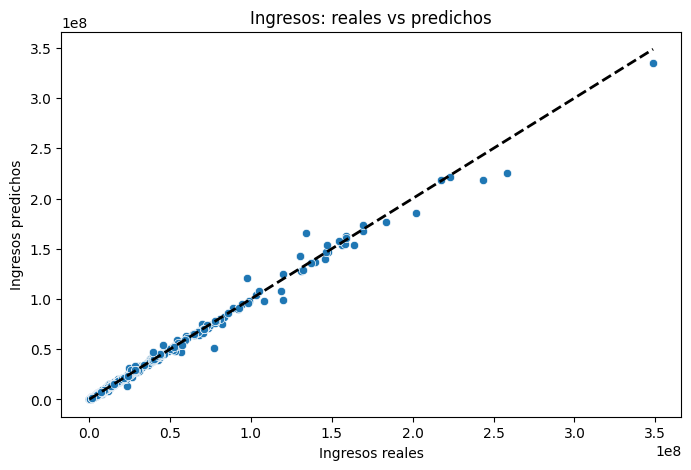

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Visualizar resultados (opcional)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Ingresos reales")
plt.ylabel("Ingresos predichos")
plt.title("Ingresos: reales vs predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Nos hemos dado cuenta que los ingresos es una variable calculada y que si relamente quedemos predecir los ingresos de un mes futuro lo que devemos hacer es predecir la cantidad de personas que usan el medio de transporte cada mes por cada operador
## Acontinuacion haremos un modelo para predecir la cantidad de pasajeros



In [130]:
# 2. Extraer características temporales
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["mes_ano"] = df["fecha"].dt.to_period('M').dt.to_timestamp()

# 3. Agrupar por operador y mes
df_agg = df.groupby(["Nombre Operador", "mes_ano"]).agg({
    "pasajeros_totales": "sum"
}).reset_index()

# Crear nuevas columnas de año y mes
df_agg["año"] = df_agg["mes_ano"].dt.year
df_agg["mes"] = df_agg["mes_ano"].dt.month



C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\3313982152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["año"] = df["fecha"].dt.year
C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\3313982152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mes"] = df["fecha"].dt.month
C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\3313982152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

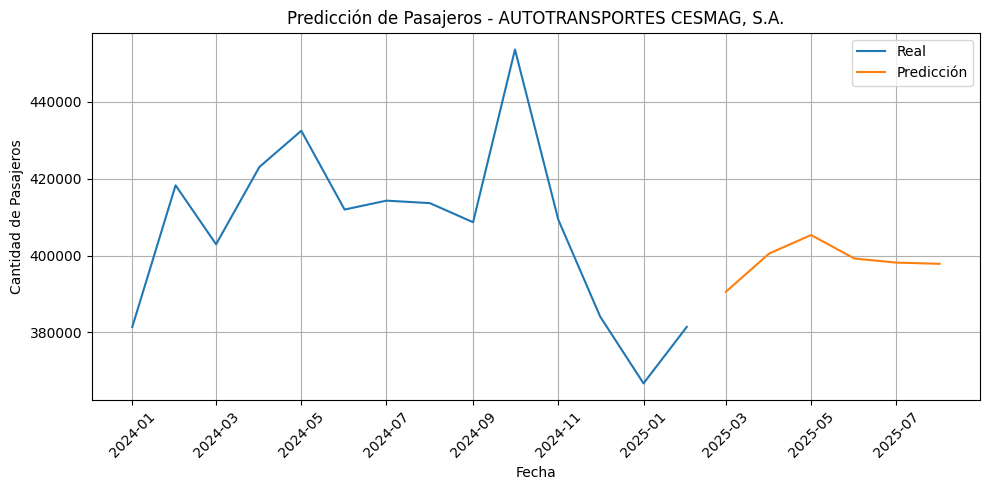

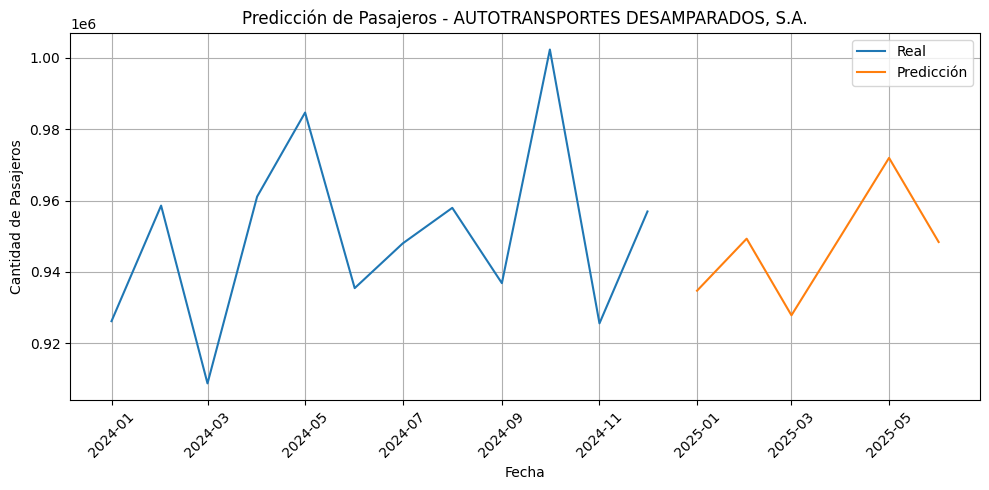

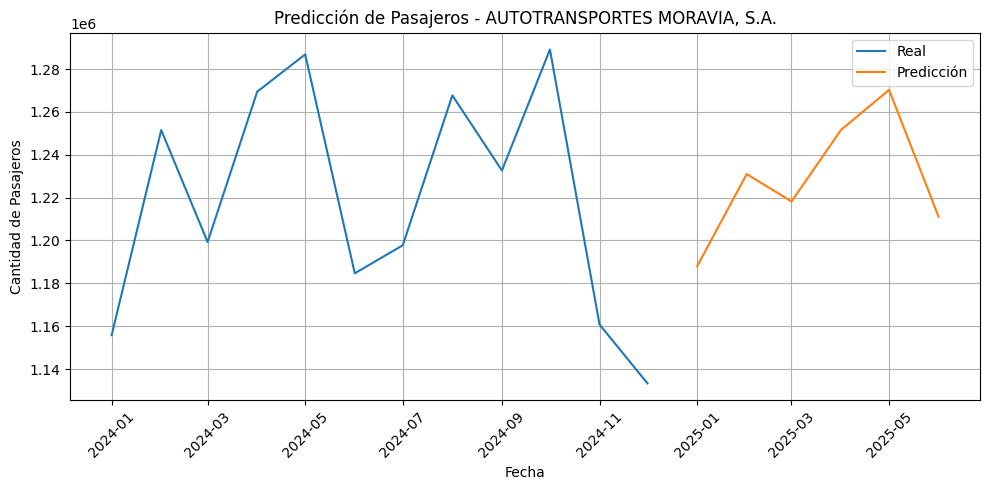

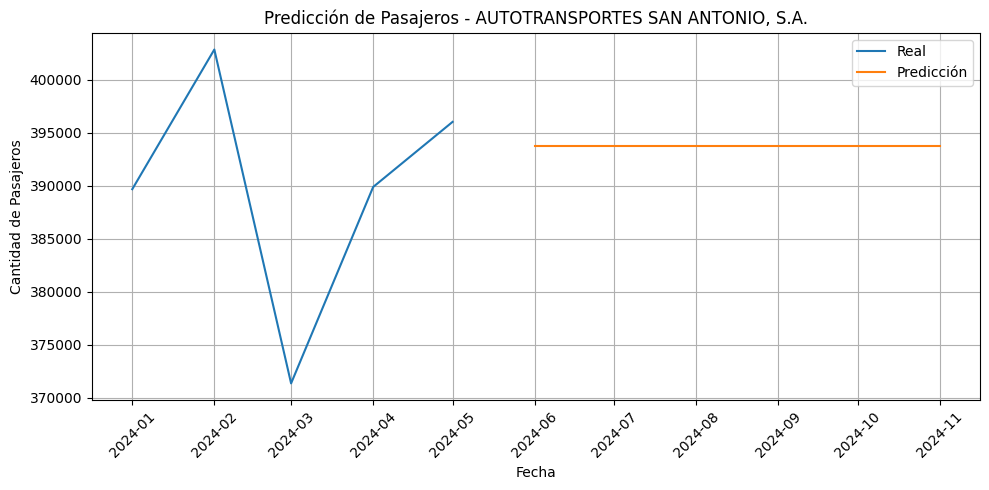

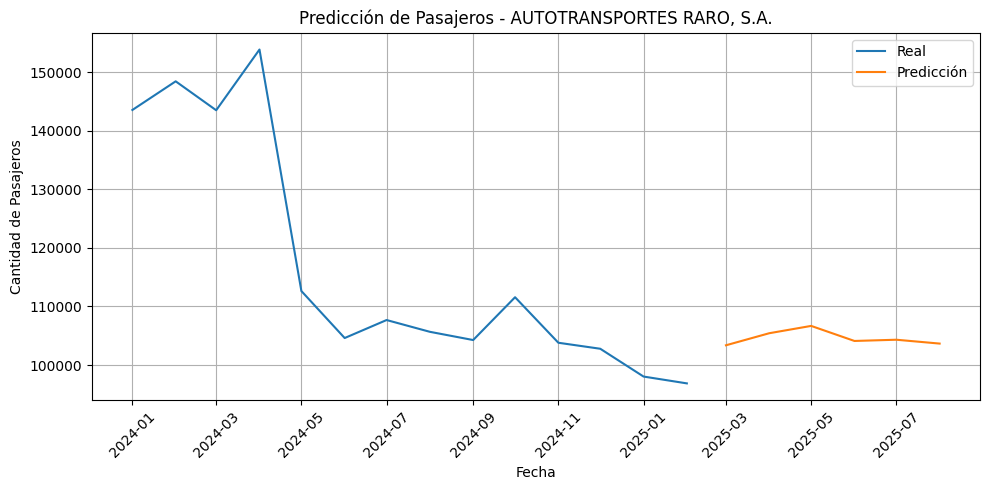

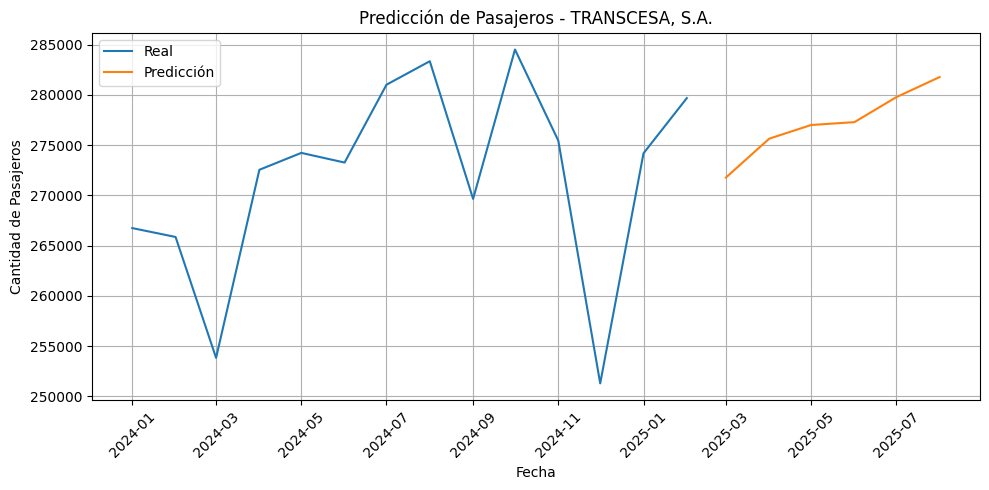

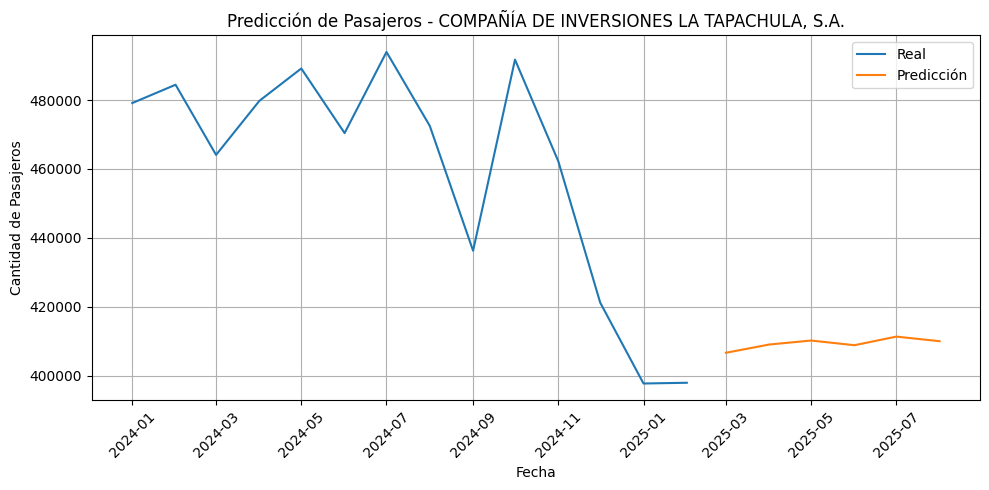

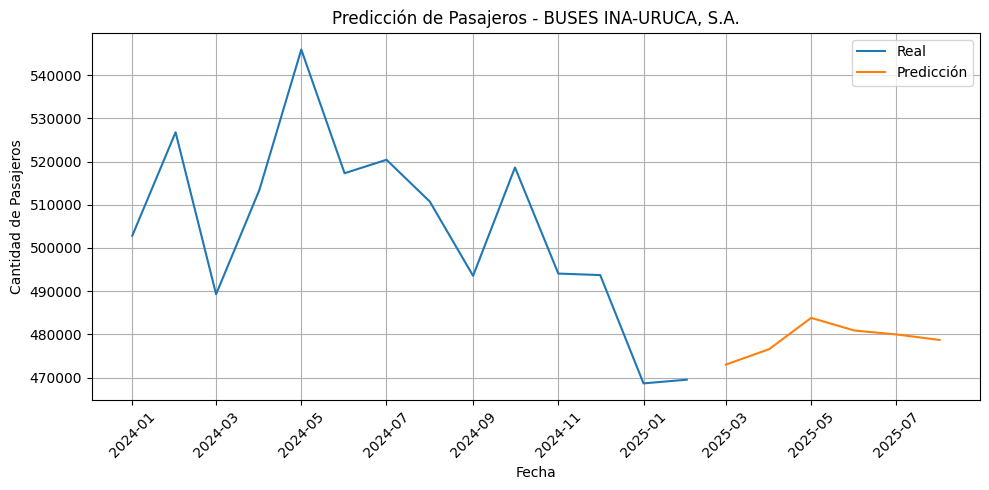

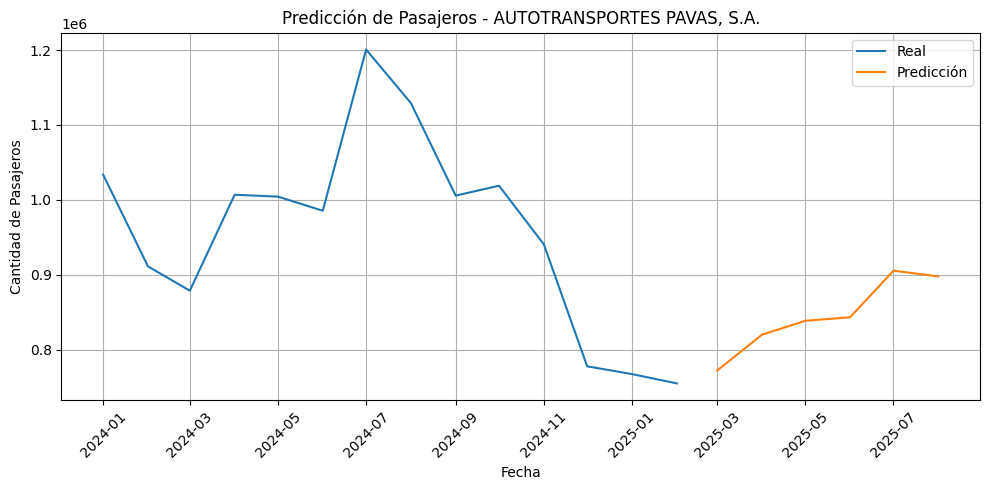

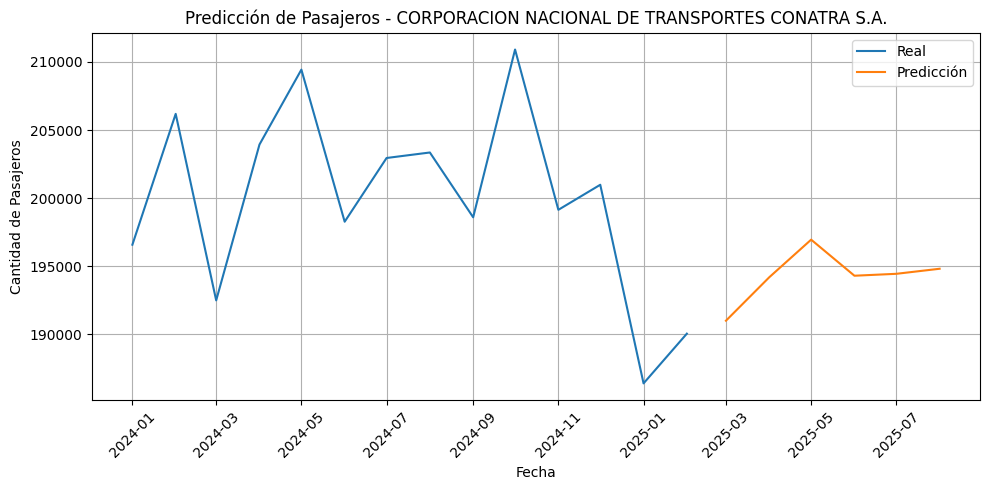

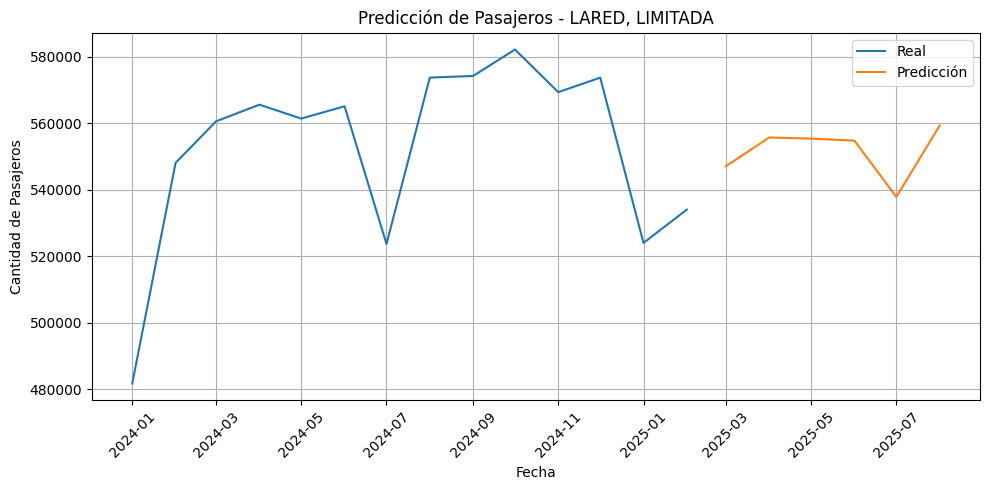

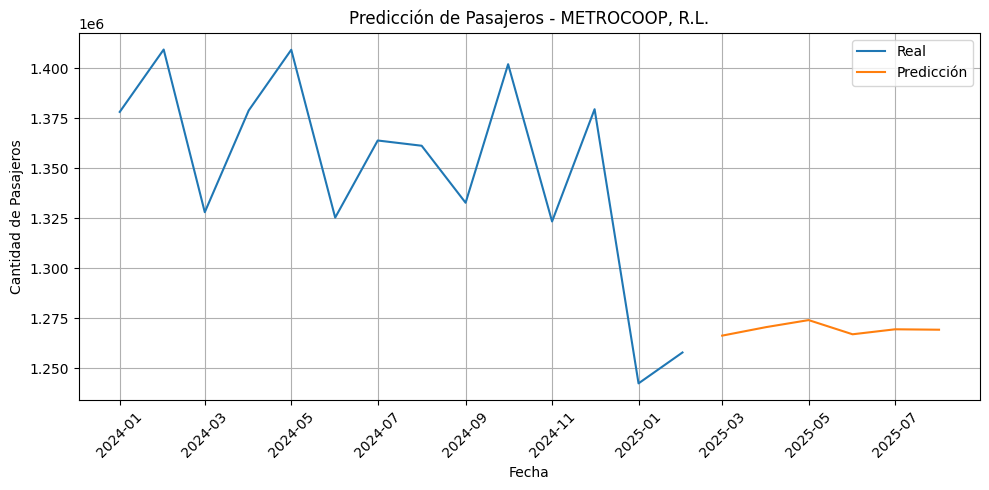

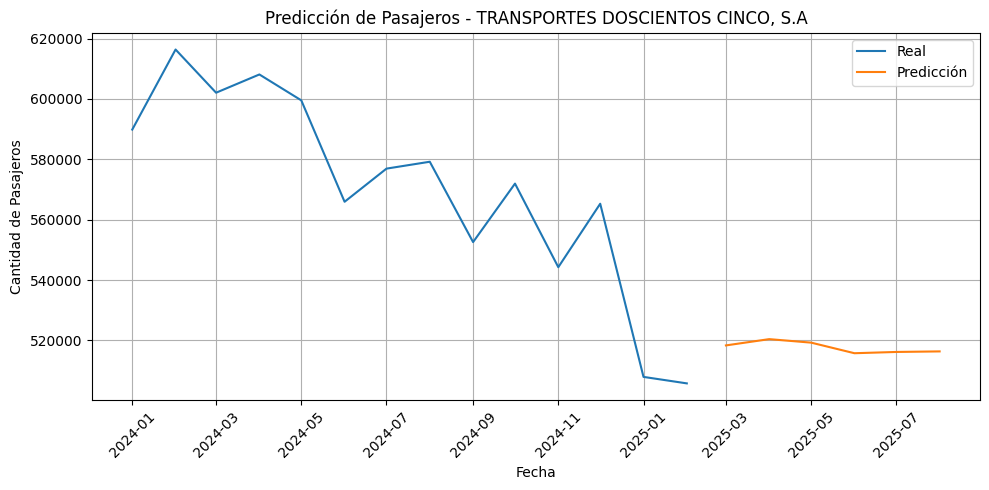

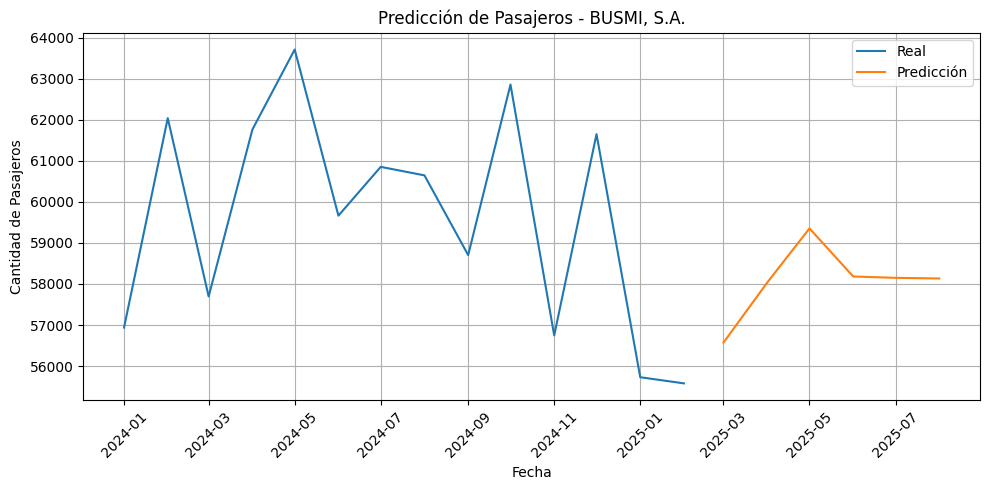

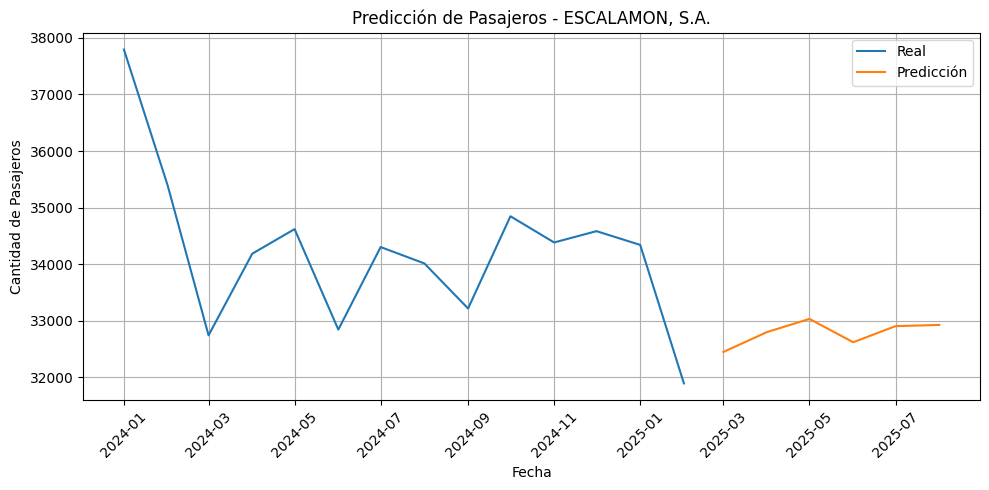

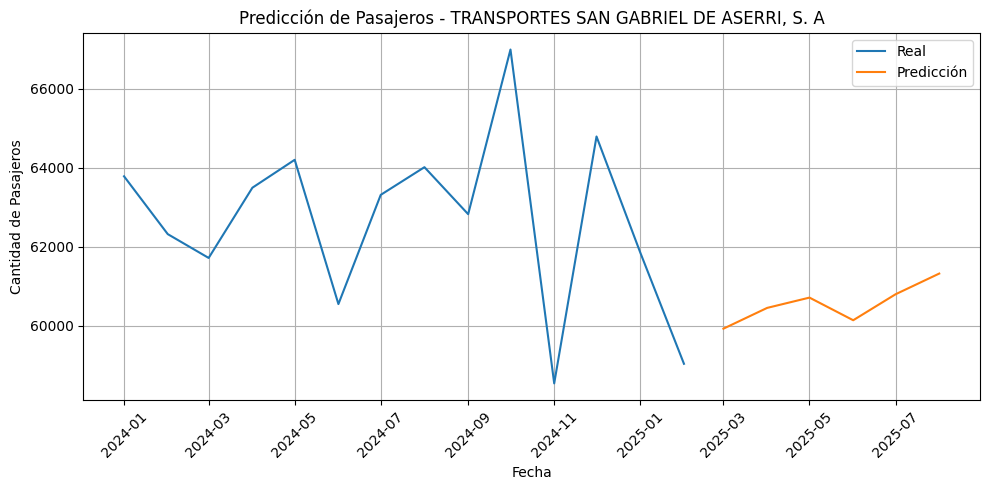

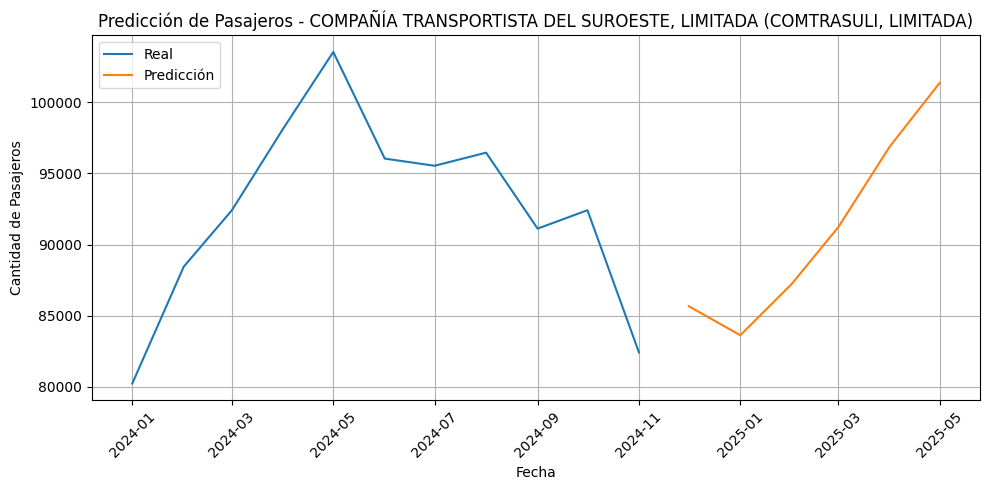

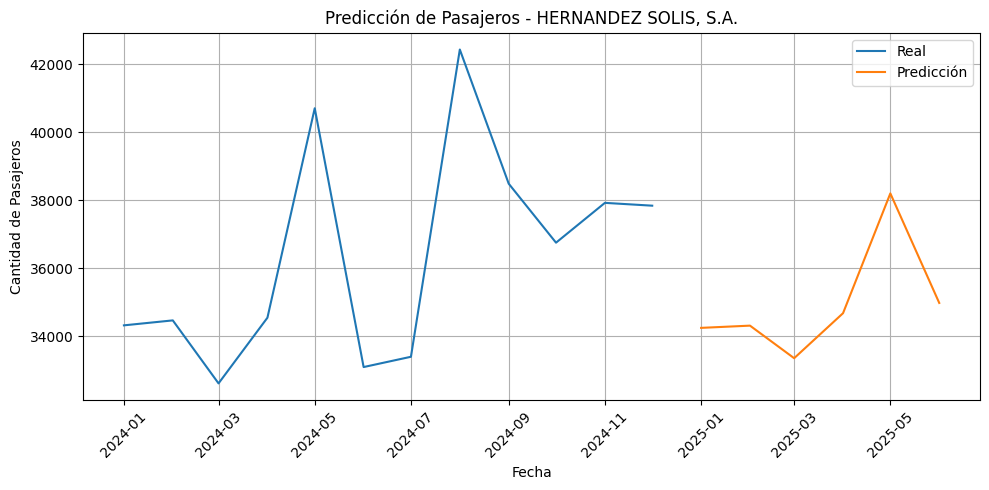

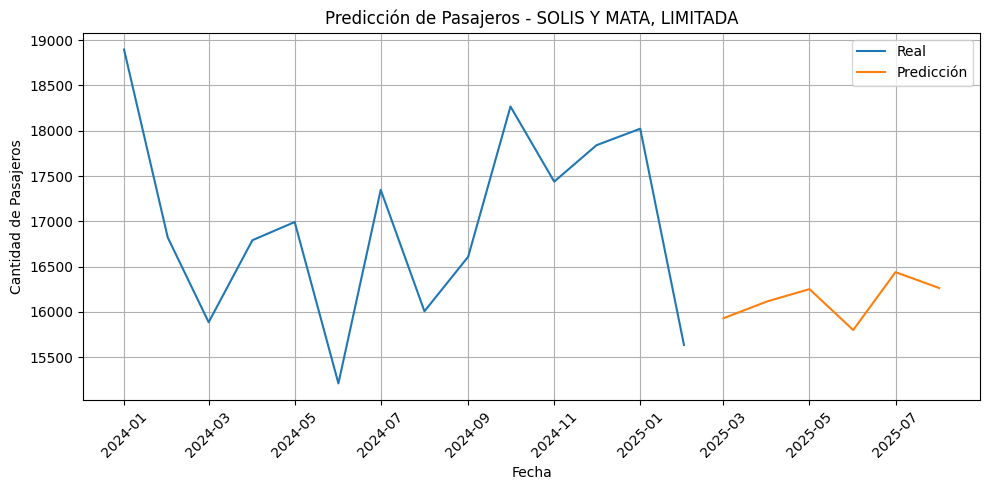

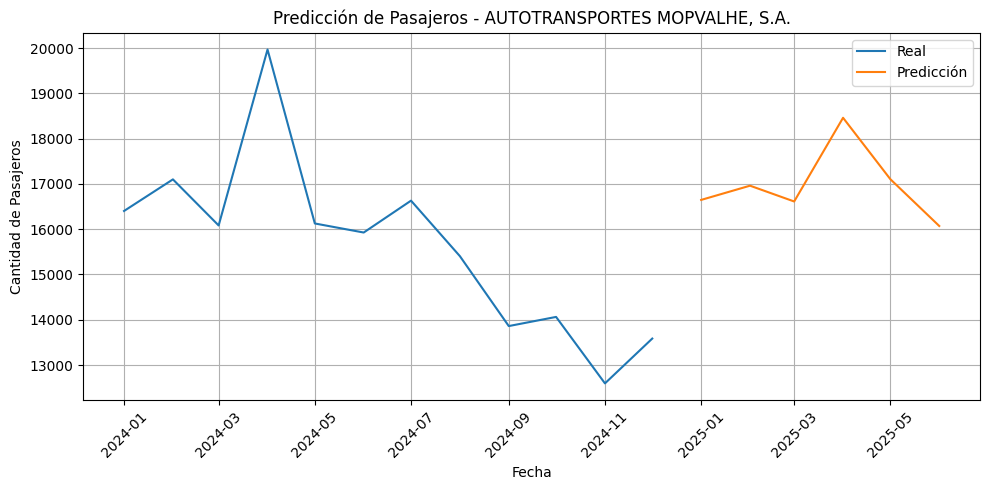

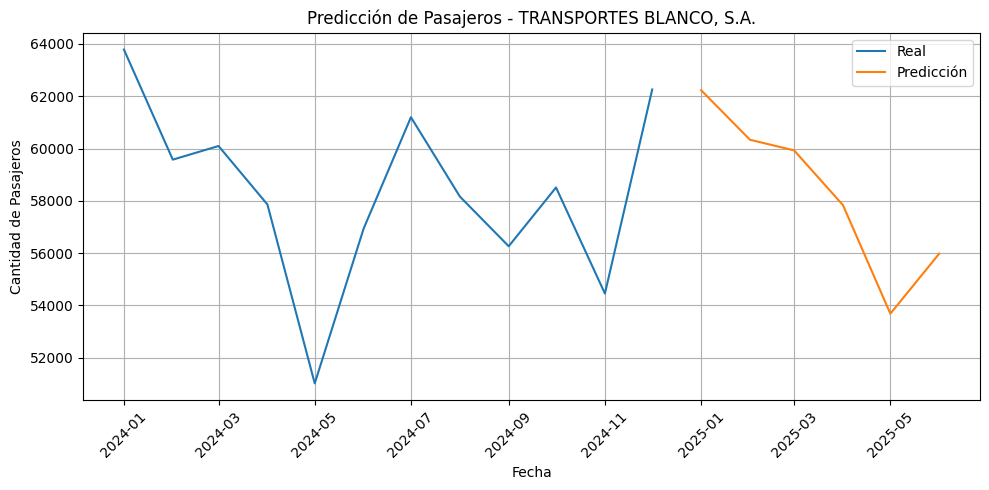

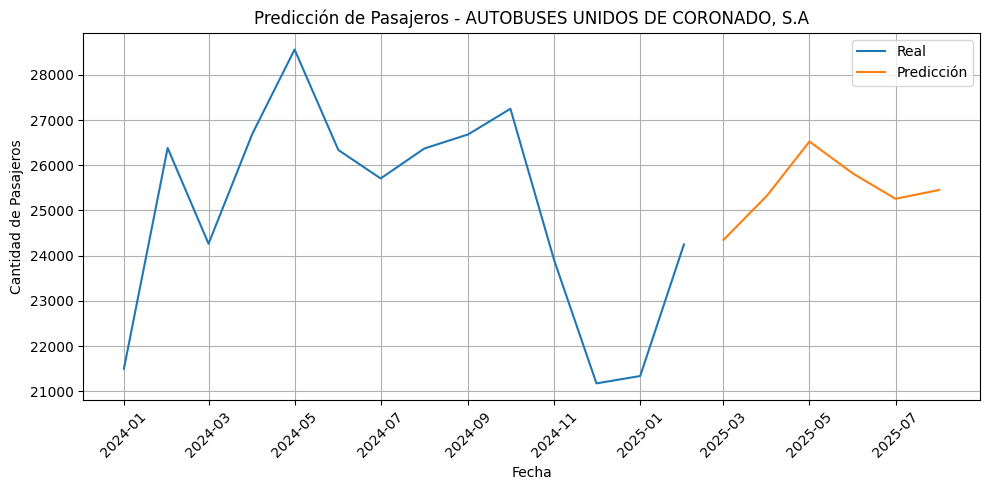

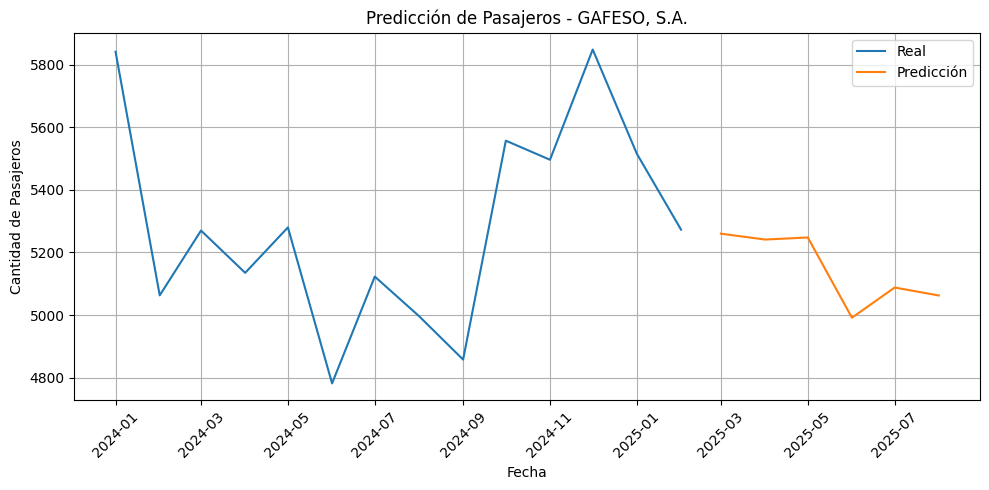

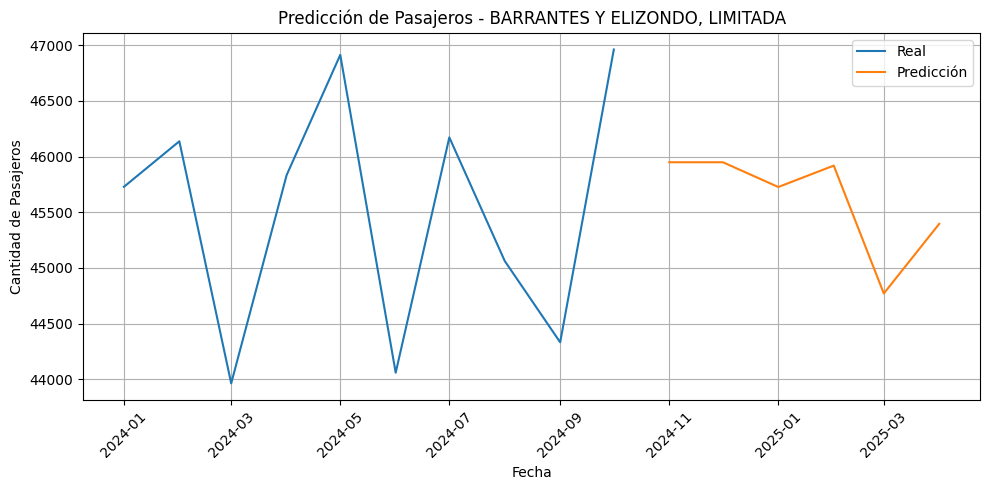

In [ ]:

# 4. Predecir por operador
for operador in operadores:
    df_op = df_agg[df_agg["Nombre Operador"] == operador]

    # Variables predictoras y objetivo
    X = df_op[["año", "mes"]]
    y = df_op["pasajeros_totales"]

    # Modelo ML
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)

    # 5. Crear fechas futuras para predecir próximos 6 meses
    last_date = df_op["mes_ano"].max()
    future_months = pd.date_range(last_date + pd.offsets.MonthBegin(), periods=6, freq='MS')
    future_df = pd.DataFrame({
        "mes_ano": future_months,
        "año": future_months.year,
        "mes": future_months.month
    })

    # Predicción
    future_df["predicted_pasajeros"] = model.predict(future_df[["año", "mes"]])
    future_df["Nombre Operador"] = operador

    # Unión para graficar
    df_plot = pd.concat([
        df_op[["mes_ano", "pasajeros_totales"]].rename(columns={"pasajeros_totales": "pasajeros"}),
        future_df[["mes_ano", "predicted_pasajeros"]].rename(columns={"predicted_pasajeros": "pasajeros"})
    ])
    df_plot["Tipo"] = ["Real"] * len(df_op) + ["Predicción"] * len(future_df)

    # 6. Graficar
    plt.figure(figsize=(10, 5))
    for tipo in ["Real", "Predicción"]:
        datos = df_plot[df_plot["Tipo"] == tipo]
        plt.plot(datos["mes_ano"], datos["pasajeros"], label=tipo)

    plt.title(f"Predicción de Pasajeros - {operador}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Pasajeros")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\jeffh\AppData\Local\Temp\ipykernel_16608\440522845.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(fechas_futuras, pred, label="Predicción", linestyle="--", marker='o')


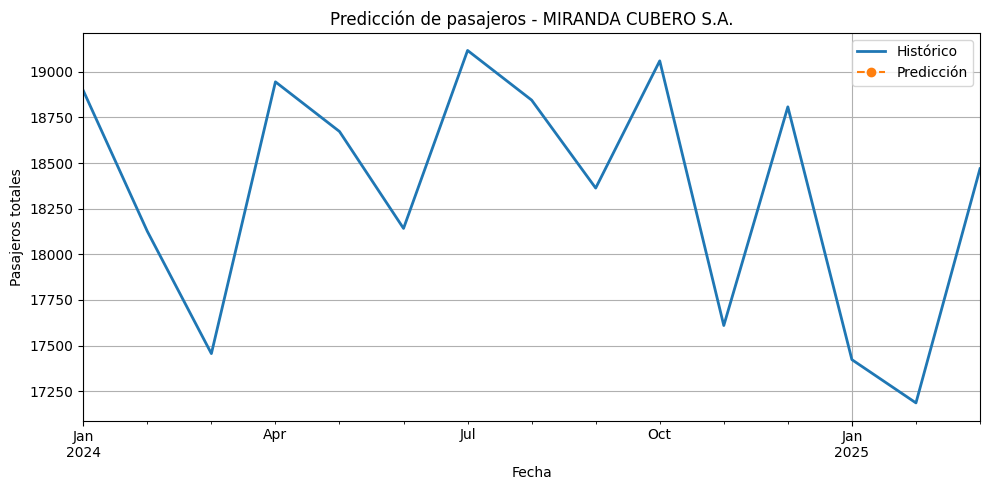

In [127]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(10, 5))

# Graficar histórico de pasajeros
df_op["pasajeros_totales"].plot(label="Histórico", linewidth=2)

# Crear un rango de fechas futuras para los próximos 7 días
ult_fecha = df_op.index.max()
fechas_futuras = pd.date_range(start=ult_fecha + pd.Timedelta(days=1), periods=7)

# Graficar predicción
plt.plot(fechas_futuras, pred, label="Predicción", linestyle="--", marker='o')

# Títulos y etiquetas
plt.title(f"Predicción de pasajeros - {operador}")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros totales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Modelo de Clasificación de operadores con mejor desempeño

In [128]:
# con este modelo se buscaria replicar las cosas que hace el mejor operador en el que peor lo hace

# Modelo de Predicción de cantidad de pasajeros

In [129]:
# con este modelo se puede valorar si es neceario agregar mas buses a la ruta o abrir nuevas rutas

